## Introduction

Dataset yang digunakan pada projek ini yaitu penjualan produk pada salah satu e-commerce terbesar di Indonesia bernama Tokopedia. Dataset ini mencakup review produk dari 29 kategori produk. Adapun yang akan saya kerjakan pada proyek ini yaitu:
1) **Data Preparation**
    - Remove unused columns
    - Drop duplicates
    - Fixing column values
2) **Exploratory Data Analysis (EDA)**
    - Top 10 regions for sellers by number of sales
    - Top 10 region for sellers with the most products
    - The best and the worst product categories based on number of sales
    - The best and the worst product categories based on total review
    - The best and the worst product categories based on price
    - The best and the worst product categories based on ratings

## Import Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Load The Data

In [2]:
df = pd.read_csv("PRDECT-ID Dataset.csv")
df.head()

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
0,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,Jakarta Utara,53500,4.9,5449,2369,5,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy
1,Computers and Laptops,PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...,Kota Tangerang Selatan,72000,4.9,2359,1044,5,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy
2,Computers and Laptops,SSD Midasforce 128 Gb - Tanpa Caddy,Jakarta Barat,213000,5.0,12300,3573,5,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy
3,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy
4,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy


In [3]:
df.shape

(5400, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         5400 non-null   object 
 1   Product Name     5400 non-null   object 
 2   Location         5400 non-null   object 
 3   Price            5400 non-null   int64  
 4   Overall Rating   5400 non-null   float64
 5   Number Sold      5400 non-null   int64  
 6   Total Review     5400 non-null   int64  
 7   Customer Rating  5400 non-null   int64  
 8   Customer Review  5400 non-null   object 
 9   Sentiment        5400 non-null   object 
 10  Emotion          5400 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 464.2+ KB


In [5]:
df.describe(include='O')

,Category,Product Name,Location,Customer Review,Sentiment,Emotion
count,5400,5400,5400,5400,5400,5400
unique,29,1308,61,5305,2,5
top,Computers and Laptops,Minigold Black Series Logam Mulia Koin Emas Mi...,Jakarta Barat,Kualitas Produk Bagus.,Negative,Happy
freq,200,25,1293,4,2821,1770


## Data Preparation

### Remove unused columns

In [6]:
df.drop(['Customer Rating', 'Customer Review', 'Sentiment', 'Emotion'], axis=1, inplace=True)

In [7]:
df.head()

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review
0,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,Jakarta Utara,53500,4.9,5449,2369
1,Computers and Laptops,PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...,Kota Tangerang Selatan,72000,4.9,2359,1044
2,Computers and Laptops,SSD Midasforce 128 Gb - Tanpa Caddy,Jakarta Barat,213000,5.0,12300,3573
3,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672
4,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672


### Check duplicates

In [8]:
df[df.duplicated()]

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review
4,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672
5,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672
8,Computers and Laptops,AFL Bidirectional HDMI Switcher 1-In 2-Out & 2...,Jakarta Barat,136500,5.0,1201,632
10,Computers and Laptops,Adaptor Charger OriginaL Laptop Asus X441 X441...,Jakarta Barat,113777,4.9,1630,777
15,Computers and Laptops,Cooling Pad Laptop Gaming 6 Fan Kipas Pendingi...,Kota Bandung,127880,4.9,1257,700
...,...,...,...,...,...,...,...
5395,Household,PCK-01 Penjepit Barang / Pickup Tool Ver.1 Ala...,Jakarta Pusat,35000,4.9,1431,562
5396,Household,Ultrasonic Aroma Diffuser Humidifier Colorful ...,Jakarta Utara,99000,4.9,15529,4074
5397,Household,Ultrasonic Aroma Diffuser Humidifier Colorful ...,Jakarta Utara,99000,4.9,15529,4074
5398,Household,Ultrasonic Aroma Diffuser Humidifier Colorful ...,Jakarta Utara,99000,4.9,15529,4074


In [9]:
# Drop duplicates
df.drop_duplicates(keep='first', inplace=True)

In [10]:
df.duplicated().sum()

0

### Fixing column values

In [11]:
df['Location'].sort_values().unique()

array([' Jakarta Barat', ' Jakarta Pusat', 'Bandung', 'Bekasi', 'Depok',
       'Jakarta Barat', 'Jakarta Barat ', 'Jakarta Pusat',
       'Jakarta Selatan', 'Jakarta Timur', 'Jakarta Utara',
       'Jakarta Utara ', 'Kab Bandung', 'Kab Bekasi', 'Kab. Bandung',
       'Kab. Bandung Barat', 'Kab. Batang', 'Kab. Bekasi', 'Kab. Bogor',
       'Kab. Cianjur', 'Kab. Garut', 'Kab. Kediri', 'Kab. Klaten',
       'Kab. Malang', 'Kab. Mojokerto', 'Kab. Pekalongan',
       'Kab. Pemalang', 'Kab. Semarang', 'Kab. Serang', 'Kab. Sidoarjo',
       'Kab. Sleman', 'Kab. Sukabumi', 'Kab. Sukoharjo', 'Kab. Tangerang',
       'Kab. Tegal', 'Kab. Tulungagung', 'Kab.�Bekasi',
       'Kabupaten Sukoharjo', 'Kota Bandar Lampung', 'Kota Bandung',
       'Kota Batam', 'Kota Bekasi', 'Kota Bogor', 'Kota Cimahi',
       'Kota Denpasar', 'Kota Depok', 'Kota Depok ', 'Kota Makassar',
       'Kota Malang', 'Kota Medan', 'Kota Palangkaraya', 'Kota Palembang',
       'Kota Semarang', 'Kota Surabaya', 'Kota Surakarta

**What will be improved are:
1) Removing unnecessary characters and excess spaces at the beginning and end of values
2) Change "Kab" to "Kab." because it has the same meaning
3) "Sidoarjo" is a district, so it will be changed to "Kab. Sidoarjo"
4) The word "City" in the prefix of the city name will be removed**

In [12]:
df['Location'] = df['Location'].str.strip()
df['Location'] = df['Location'].replace(['Kab.�Bekasi'], 'Kab. Bekasi')
df['Location'] = df['Location'].replace(['Kab Bandung', 'Kab Bekasi', 'Sidoarjo'], ['Kab. Bandung', 'Kab. Bekasi', 'Kab. Sidoarjo'])
df['Location'] = df['Location'].replace({'Kota ':''}, regex=True)

In [13]:
df['Location'].sort_values().unique()

array(['Bandar Lampung', 'Bandung', 'Batam', 'Bekasi', 'Bogor', 'Cimahi',
       'Denpasar', 'Depok', 'Jakarta Barat', 'Jakarta Pusat',
       'Jakarta Selatan', 'Jakarta Timur', 'Jakarta Utara',
       'Kab. Bandung', 'Kab. Bandung Barat', 'Kab. Batang', 'Kab. Bekasi',
       'Kab. Bogor', 'Kab. Cianjur', 'Kab. Garut', 'Kab. Kediri',
       'Kab. Klaten', 'Kab. Malang', 'Kab. Mojokerto', 'Kab. Pekalongan',
       'Kab. Pemalang', 'Kab. Semarang', 'Kab. Serang', 'Kab. Sidoarjo',
       'Kab. Sleman', 'Kab. Sukabumi', 'Kab. Sukoharjo', 'Kab. Tangerang',
       'Kab. Tegal', 'Kab. Tulungagung', 'Kabupaten Sukoharjo',
       'Makassar', 'Malang', 'Medan', 'Palangkaraya', 'Palembang',
       'Pekalongan', 'Semarang', 'Surabaya', 'Surakarta', 'Tangerang',
       'Tangerang Selatan', 'Tasikmalaya'], dtype=object)

### Top 10 regions for sellers by number of sales

In [14]:
df1 = pd.DataFrame(df.groupby('Location')['Number Sold'].sum().reset_index())
df1.columns = ['Location', 'Number Sold']
sort_df = df1.sort_values(['Number Sold'],ascending=True)

fig = px.bar(sort_df.iloc[-10:,:], y='Location', x='Number Sold', color='Number Sold')
fig.update_layout(title_text='Top 10 regions for sellers by number of sales', title_x=0.5)
fig.show()

### Top 10 region for sellers with the most products

In [15]:
len(df['Category'])

1356

In [16]:
df1 = pd.DataFrame(df.groupby('Location')['Product Name'].nunique().reset_index())
df1.columns = ['Location', 'Product Name']
sort_df = df1.sort_values(['Product Name'],ascending=True)

fig = px.bar(sort_df.iloc[-10:,:], y='Location', x='Product Name', color='Product Name',
             labels={'Product Name':'Total Product'})
fig.update_layout(title_text='Top 10 regions for sellers with the most products', title_x=0.5)
fig.show()

### Product categories based on number of sales

In [17]:
df1 = pd.DataFrame(df.groupby('Category')['Number Sold'].sum().reset_index())
df1.columns = ['Category', 'Number Sold']

# Highest number of sales
sort_df = df1.sort_values(['Number Sold'],ascending=True)

fig1 = px.bar(sort_df.iloc[-10:,:], y='Category', x='Number Sold', color='Number Sold')
fig1.update_layout(title_text='Product Categories with the Highest number of sales', title_x=0.5)
fig1.show()

# Lowest number of sales
sort_df = df1.sort_values(['Number Sold'],ascending=False)

fig2 = px.bar(sort_df.iloc[-10:,:], y='Category', x='Number Sold', color='Number Sold')
fig2.update_layout(title_text='Product Categories with the Lowest number of sales', title_x=0.5)
fig2.show()

### Product categories based on total review

In [18]:
df1 = pd.DataFrame(df.groupby('Category')['Total Review'].sum().reset_index())
df1.columns = ['Category', 'Total Review']

# Highest number of sales
sort_df = df1.sort_values(['Total Review'],ascending=True)

fig1 = px.bar(sort_df.iloc[-10:,:], y='Category', x='Total Review', color='Total Review')
fig1.update_layout(title_text='Product Categories with the Most number of reviews', title_x=0.5)
fig1.show()

# Lowest number of sales
sort_df = df1.sort_values(['Total Review'],ascending=False)

fig2 = px.bar(sort_df.iloc[-10:,:], y='Category', x='Total Review', color='Total Review')
fig2.update_layout(title_text='Product Categories with the Least number of reviews', title_x=0.5)
fig2.show()

### Product categories based on price

In [19]:
df1 = pd.DataFrame(df.groupby('Category')['Price'].mean().reset_index())
df1.columns = ['Category', 'Price']

# Highest price
sort_df = df1.sort_values(['Price'],ascending=True)

fig = px.bar(sort_df.iloc[-10:,:], y='Category', x='Price', color='Price')
fig.update_layout(title_text='Product Categories with the Highest price', title_x=0.5)
fig.show()

# Lowest price
sort_df = df1.sort_values(['Price'],ascending=False)

fig = px.bar(sort_df.iloc[-10:,:], y='Category', x='Price', color='Price')
fig.update_layout(title_text='Product Categories with the Lowest price', title_x=0.5)
fig.show()

### Product categories based on ratings

In [20]:
df1 = pd.DataFrame(df.groupby('Category')['Overall Rating'].mean().reset_index())
df1.columns = ['Category', 'Overall Rating']

# Highest rated
sort_df = df1.sort_values(['Overall Rating'],ascending=True)

fig = px.bar(sort_df.iloc[-10:,:], y='Category', x='Overall Rating', color='Overall Rating')
fig.update_layout(title_text='Product Categories with the Highest rated', title_x=0.5)
fig.show()

# Lowest rated
sort_df = df1.sort_values(['Overall Rating'],ascending=False)

fig = px.bar(sort_df.iloc[-10:,:], y='Category', x='Overall Rating', color='Overall Rating')
fig.update_layout(title_text='Product Categories with the Lowest rated', title_x=0.5)
fig.show()

Pertanyaan:
1) Apakah harga produk berpengaruh terhadap jumlah pembelian?
2) Apakah rating berpengaruh terhadap jumlah pembelian?
3) Apakah jumlah review berpengaruh terhadap jumlah pembelian?

## Data Preprocessing

### Drop Unneccessary Features

In [21]:
df.drop(['Category', 'Product Name', 'Location'], axis=1, inplace=True)

In [22]:
df.head()

,Price,Overall Rating,Number Sold,Total Review
0,53500,4.9,5449,2369
1,72000,4.9,2359,1044
2,213000,5.0,12300,3573
3,55000,4.7,2030,672
6,85000,4.9,1339,718


<Axes: >

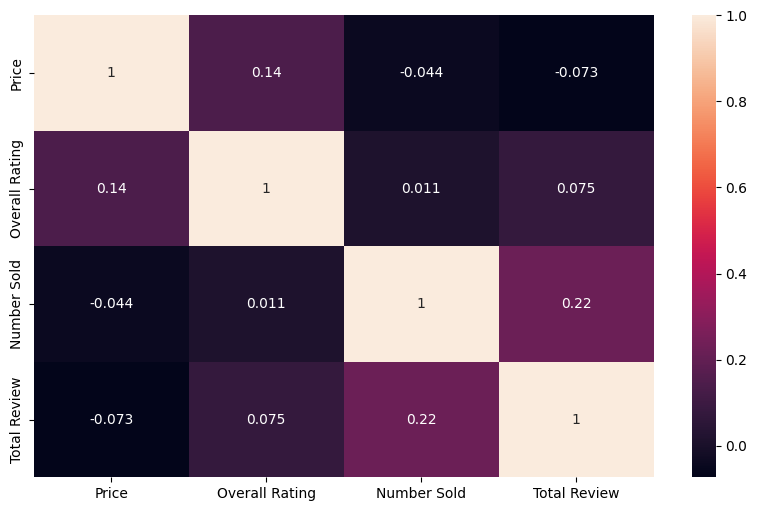

In [23]:
# Show Correlation between Features
plt.figure(figsize= [10, 6])
sns.heatmap(df.corr(), annot= True)